# Chapter 3: Linearity
Linearity is a foundational concept in machine learning, characterizing models where the output is a direct, weighted sum of the input features. While simple and highly interpretable, linear models like Linear and Logistic Regression make strong assumptions about the underlying data structure. Their performance is often limited when faced with complex, non-linear relationships. However, the principle of linearity remains profoundly influential, serving as the essential building block within sophisticated non-linear architectures such as neural networks and kernel methods. This chapter covers fundamental concepts through building end-to-end projects based on the machine learning life cycle.

## Table of Contents
- [Linear Regression](#linear-regression)
- [Gradient Descent](#gradient-descent)
- [Gradient Descent Variations](#gradient_descent_variations)
- [Stochastic Gradient Descent](#stochastic-gradient-descent)
- [Mini-batch Gradient Descent](#mini-batch-gradient-descent)
- [Advanced Optimizers](#advanced-optimizers)
- [Linear Classification (Logistic Regression)](#linear-classification-logistic-regression)
- [References](#references)

## Linear Regression
Linear regression is the primary supervised learning algorithm that fits a linear function to the data. It is a statistical method that can be used to solve multi-dimensional problems. The number of features (independent variables) determines the **feature space dimensionality (input space)**.

### Simple Linear Regression
In a **1D feature space**, the simple linear regression is mathematically expressed as the best straight line.
$$ \hat{y} = w_1x + w_0 $$

Where:
- $ \hat{y} $ is the **fitted** line (predicted output of the model)
- $ w_1 $ is the **slope**.
- $ w_0 $ is the **intercept**.

### Multiple Linear Regression
The equation stated can be generalized in **n-dimensional** feature space as shown in the following. The model is a **hyperplane** in this scenario.
$$ \hat{y} = w_nx_n + ... + w_1x_1 + w_0 $$

Where $w = (w_0, w_1, ..., w_n)$ is the **weight (coefficient) vector**.

<img src="../figures/figure_3_1_linear_regression.png" alt="Linear Regression">
<p style="text-align:center; cursor:pointer;"><a src="https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">Source: Scikit-learn User Guide</a></p>

### Ordinary Least Squares
There are many different methods to solve the stated problem. **Ordinary Least Squares (OLS**) is the most common method used for fitting a linear regression model. Its goal is to find the line (or hyperplane) that **minimizes** the **total squared error** between the **predicted** values and the **actual** descrete data.

A **loss function** (also called cost/error/objective function in the context of optimization) is a mathematical function that measures how well a machine learning model's predictions match the actual true values. There are different loss functions for different purposes that are explained in the next sections. **L2 Loss** (euclidean norm) is a fundamental loss function that measures the squared difference between predicted and true values. For a single data point it is expressed as follows.
$$ \text{Loss} = (t_\text{true} - y_\text{predicted}) ^ 2 $$

For a dataset that contains a number of data points, **Mean Squared Error (MSE)** is typically used.
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n}{(y_i - \hat{y}_i) ^ 2} $$

### Problem Statement and Formulation
In order to minimize the MSE function, the following optimization problem should be solved for the **decision variable vector** $w$.
$$ w^* = \underset{w \in R^n}{\arg\min} \, L(w) $$

Where:
- $ L $ is the **MSE function** that is supposed to be minimized.
- $ w^* $ is the **minimizing vector**.

While setting the derivative to zero finds **stationary points** in single-variable calculus, the **multivariate generalization** is shown in the following **gradient-based** equation.
$$ ∇L = [\frac{\partial L}{\partial w_0}, \frac{\partial L}{\partial w_1}, ..., \frac{\partial L}{\partial w_n}] ^ T = 0$$

Where $∇$ is the **gradient operator**.

The stated set of equations is called **Normal Equations** in the context of machine learning that simultaneously sets all **partial derivatives** to zero, identifying flat regions in the parameter space where no single parameter adjustment can decrease the loss, which for convex functions like MSE guarantees finding the **global optimum** that defines the ordinary least squares solution.

In simple linear regression, the normal equations can be solved for slope ($w_1$) and intercept ($w_0$) as shown in the following.
$$ L = \frac{1}{n} \sum_{i=1}^{n}{(y_i - \hat{y}_i) ^ 2} = \frac{1}{n} \sum_{i=1}^{n}{(y_i - w_1x + w_0) ^ 2} $$

$$
\Rightarrow \left\{
\begin{aligned}
\frac{\partial L}{\partial w_0} &= -2\sum_{i=1}^{n} (y_i - w_1 x_i - w_0) = 0 \\
\frac{\partial L}{\partial w_1} &= -2\sum_{i=1}^{n} x_i(y_i - w_1 x_i - w_0) = 0
\end{aligned}
\right.
$$

Solving the coupled system yields the minimizing weights.
$$ w_0 = \bar{y} - w_1 \bar{x} $$
$$ w_1 = \frac{\sum [(x_i - \bar{x}) \times (y_i - \bar{y})]}{\sum (x_i - \bar{x})^2} $$

In addition to $\text{MSE}$, there are other **evaluation** criteria (metrics) for regression models, varying by their purpose and use cases. One of the primary **accuracy metrics** is the **coefficient of determination ($R^2$ and Adjusted $R^2$)**. For simple linear regression it is expressed as the following equations.
$$ R^2 = 1 - \frac{SS_\text{res}}{SS_\text{tot}} $$

Where:
- $ SS_\text{res} $ is the sum of squares of residuals, also called the **residual sum of squares**.
$$ SS_\text{res} = \sum_{i=1}^{n}{(y_i - \hat{y}_i) ^ 2} $$

- $ SS_\text{tot} $ is the **total sum of squares** (proportional to the variance of the data).
$$ SS_\text{tot} = \sum_{i=1}^{n}{(y_i - \bar{y}_i) ^ 2} $$

In the **best case**, the modeled values exactly match the observed values which results in $SS_\text{res} = 0$ and $R^2 = 1$. A baseline model that always predicts $\bar{y}$, will have $R^2 = 0$.

### Project: CO2 Emission Prediction
The objective is to generally analyze the provided dataset `co2_emission.csv` and build a machine learning model to predict the CO2 emission of a car based on its engine size.

### Data Pipeline
As explained in chapter 1, data pipeline consists of 4 stages. Collection, Preprocessing, EDA and Feature Engineering.

### Loading the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/co2_emission.csv")
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1.0,790.0,99.0
1,Mitsubishi,Space Star,1.2,1160.0,95.0
2,Skoda,Citigo,1.0,929.0,95.0
3,Fiat,500,0.9,865.0,90.0
4,Mini,Cooper,1.5,1140.0,105.0


In [2]:
df.dtypes

Car        object
Model      object
Volume    float64
Weight    float64
CO2       float64
dtype: object

In [3]:
df.describe()

,Volume,Weight,CO2
count,51.000000,50.000000,51.000000
mean,1.707843,1314.480000,107.627451
std,0.642758,321.715633,34.248481
min,0.800000,750.000000,35.000000
25%,1.400000,1124.250000,98.000000
50%,1.600000,1327.000000,99.000000
75%,2.000000,1424.750000,108.000000
max,4.500000,2500.000000,280.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Car     49 non-null     object 
 1   Model   50 non-null     object 
 2   Volume  51 non-null     float64
 3   Weight  50 non-null     float64
 4   CO2     51 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.2+ KB


In [5]:
df.isnull().any() # Or df.isna().any()

Car       True
Model     True
Volume    True
Weight    True
CO2       True
dtype: bool

### Data Preprocessing
The dataset must get clean from bad data which could be **empty cells**, **wrong data**, **outliers** and **duplicates**.

#### Missing Values and Non-valid Cells

In [6]:
# 1st Choice: Remove rows that contain empty cells
modified_df = df.dropna()

# Drop rows where 'Car' OR 'Model' have NaN
df.dropna(subset=['Car', 'Model'], inplace = True)

# 2nd Choice: Replace the empty values with new ones
# Replacing with Mean or median is valid.
numeric_columns = {"Volume": df["Volume"].mean(),
                   "Weight": df["Weight"].mean(),
                  "CO2": df["CO2"].mean()}
df.fillna(numeric_columns, inplace = True)

# Reset indexing
df = df.reset_index(drop = True)

#### Duplicates

In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37     True
38     True
39     True
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
dtype: bool

In [8]:
df.drop_duplicates(subset = ["Volume", "Weight"], inplace = True)
df = df.reset_index(drop = True)

#### Outliers
A data point is mathematically considered an outlier based on its deviation from the central tendency of the dataset. One of the main mathematical methods is **Z-Score (Standard Score) method**.

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- μ is the mean of the population.
- σ is the standard deviation of the population.

If $ |z| > 3 $, the data point is an outlier.

In [9]:
modified_df = df.copy()

columns = ["Volume", "Weight", "CO2"]
for column in columns:
    # Calculate mean and standard deviation
    mean = modified_df[column].mean()
    std = modified_df[column].std()
    
    # Calculate Z-scores for each column
    z_scores = abs((modified_df[column] - mean) / std)
    
    # Filter outliers
    modified_df = modified_df[z_scores < 3]

modified_df = modified_df.reset_index(drop=True)

### EDA and Feature Engineering

#### Visualization

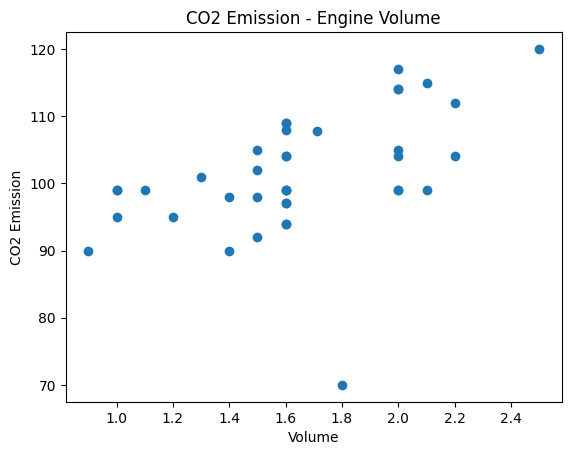

In [10]:
import matplotlib.pyplot as plt

plt.scatter(modified_df["Volume"], modified_df["CO2"])
plt.xlabel("Volume")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission - Engine Volume")
plt.show()

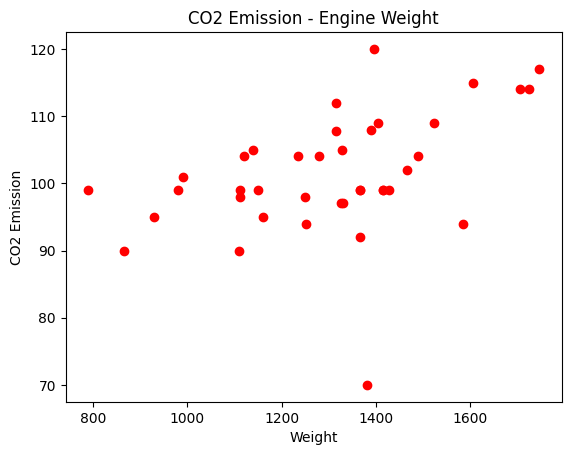

In [11]:
plt.scatter(modified_df["Weight"], modified_df["CO2"] , color = "red")
plt.xlabel("Weight")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission - Engine Weight")
plt.show()

A critical flaw in Z-score outlier removal can be seen. This is a well-known problem called **masking and swamping**. When outliers are removed iteratively and mean/std are recalculated each time:

1. Initial removal deletes extreme outliers.
2. Mean and std change significantly (mean moves toward center, std decreases).
3. Previously "normal" points now become outliers under the new, tighter distribution.
4. This creates "new" outliers that weren't outliers originally.

Another outlier removing method that is more robust than Z-score is **Interquartile Range (IQR)** which is based on box plot. IQR uses quartiles (Q1, Q3) that leads to robust statistics not affected by extreme values while Z-score uses mean and standard deviation making it highly sensitive to extreme values.

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary:

1. Minimum
2. First Quartile (Q1)
3. Median or Second Quartile (Q2)
4. Third Quartile (Q3)
5. Maximum

Outliers can be detected using this method as shown in the following.
$$ \text{IQR} = Q_3 - Q_1 $$
$$ \text{Lower Bound} = Q1 - 1.5 \times IQR $$
$$ \text{Upper Bound} = Q3 + 1.5 \times IQR $$

If a data point is less than the lower bound or greater than the upper bound, it is considered as an outlier.

In [13]:
columns = ["Volume", "Weight", "CO2"]

outliers_index = []
for column in columns:
    
    first_quantile = df[column].quantile(0.25)
    third_quantile = df[column].quantile(0.75)
    iqr = third_quantile - first_quantile

    lower_bound = first_quantile - 1.5 * iqr
    upper_bound = third_quantile + 1.5 * iqr

    for index in range(len(df[column])):
        if df[column][index] < lower_bound or df[column][index] > upper_bound:
            outliers_index.append(index)
    
df = df.drop(set(outliers_index)).reset_index(drop = True)

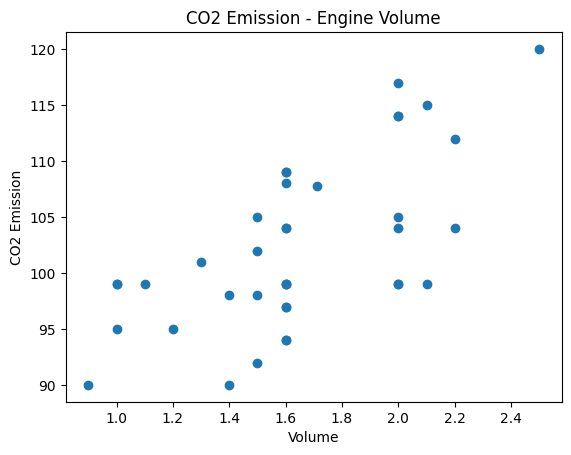

In [14]:
plt.scatter(df["Volume"], df["CO2"])
plt.xlabel("Volume")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission - Engine Volume")
plt.show()

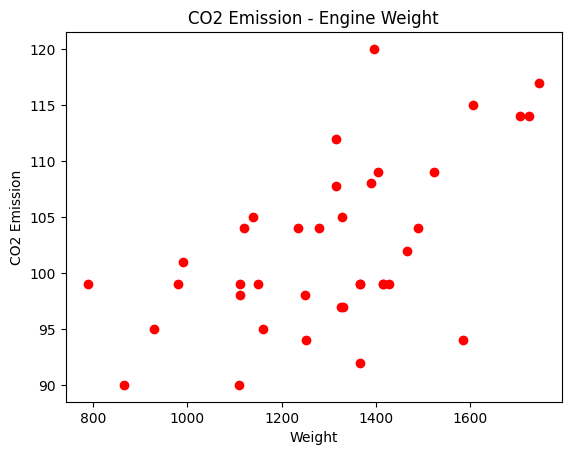

In [15]:
plt.scatter(df["Weight"], df["CO2"] , color = "red")
plt.xlabel("Weight")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission - Engine Weight")
plt.show()

#### Correlation Matrix

In [16]:
df[["Volume", "Weight", "CO2"]].corr()

,Volume,Weight,CO2
Volume,1.000000,0.714240,0.656861
Weight,0.714240,1.000000,0.575952
CO2,0.656861,0.575952,1.000000


### Clean, Modified Dataset

In [17]:
df.to_csv("../data/processed/co2_emission_processed.csv", index = False)

### Model Pipeline

### Simple Regression from Scratch

In [20]:
import numpy as np

def linear_regression(X: list, y: list) -> tuple:

    X_mean = np.mean(X)
    y_mean = np.mean(y)

    numerator = 0
    denominator = 0
    for i in range(len(X)):
        numerator += (X[i] - X_mean) * (y[i] - y_mean)
        denominator += (X[i] - X_mean) ** 2

    slope = numerator / denominator
    intercept = y_mean - slope * X_mean
    
    return slope, intercept

In [21]:
X = df["Volume"]
y = df["CO2"]
slope, intercept = linear_regression(X, y)
print(f"Slope: {slope:.2f} and Intercept: {intercept:.2f}")

Slope: 13.03 and Intercept: 80.89


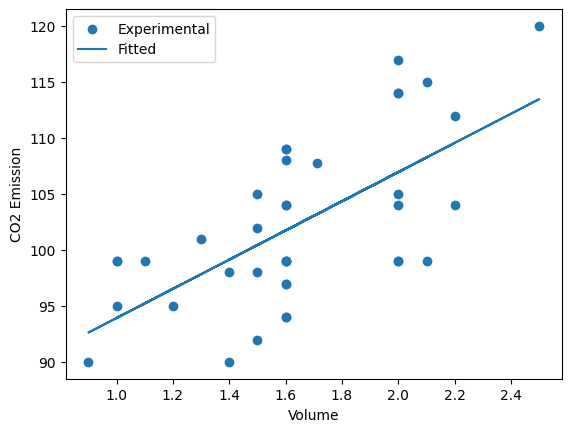

In [22]:
model = lambda x: slope * x + intercept
predicted_values = list(map(model, X))

plt.scatter(X, y, label = "Experimental")
plt.plot(X, predicted_values, label = "Fitted")
plt.xlabel("Volume")
plt.ylabel("CO2 Emission")
plt.legend()
plt.show()

In [23]:
def calculate_r2_score(y_true: list, y_pred: list) -> float:
    y_mean = np.mean(y_true)
    ss_res, ss_tot = 0, 0
    for i in range(len(y_true)):
        ss_res += (y_true[i] - y_pred[i]) ** 2
        ss_tot += (y_true[i] - y_mean) ** 2

    r2_score = 1 - ss_res / ss_tot
    return r2_score

r2_score = calculate_r2_score(y, predicted_values)
print(f"R-Squared is {r2_score:.2f}")

R-Squared is 0.43


In [24]:
import json

output = {
    "model_type": "linear_regression",
    "version": "1.0.0",
    "coefficients": [slope, intercept],
    "feature_names": ["volume"],
    "target_name": "co2_emission"
}

with open("../models/linear_regression.json", "w") as file:
    json.dump(output, file, indent = 4)

### Multiple Regression using Scikit-learn
#### Splitting & Scaling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting
X = df[["Volume", "Weight"]]
y = df["CO2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
standard_scaler = StandardScaler()
# For training data fit_transform is used
X_train_scaled = standard_scaler.fit_transform(X_train)
# For test data transform is used
X_test_scaled = standard_scaler.transform(X_test)

#### Training

In [27]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
print(f"Slope and Intercept are: {linear_regression.coef_}")

Slope and Intercept are: [4.70514139 0.0427691 ]


#### Prediction

In [32]:
X_test_scaled

array([[-0.09148634,  0.63847957],
       [-0.58477791, -0.0758999 ],
       [-0.33813213, -0.58287887],
       [-0.09148634,  0.27437649],
       [ 0.89509679,  2.2101144 ],
       [ 0.89509679,  2.11332751],
       [-0.33813213,  0.45412358],
       [-0.09148634,  1.18232975]])

In [31]:
linear_regression.predict(X_test_scaled)

array([101.08834037,  98.73678043,  99.87560068, 101.07276801,
       105.79757093, 105.79343145,  99.91995235, 101.11160036])

In [34]:
volume, weight = input("Enter Engine Size (e.g. 1.3,2300):").split(",")
inputs_df = pd.DataFrame({"Volume" : [volume],
     "Weight" : [weight]})

scaled_inputs = standard_scaler.transform(inputs_df)

# Make predictions
prediction = linear_regression.predict(scaled_inputs)
print(f"CO2 Emission: {prediction[0]:.2f}")

Enter Engine Size (e.g. 1.3,2300): 1.3,1100


CO2 Emission: 97.55


## Gradient Descent (Batch or Vanilla)
**Optimization** forms the computational core of machine learning, framing model training as the search for parameters that **minimize a loss function**. Gradient descent is the foundational **iterative algorithm** that solves this problem. By calculating the gradient of the loss, it navigates the parameter space, taking steps proportional to the negative gradient to converge toward a **local minimum**. This simple yet powerful principle of following the path of **steepest descent** enables the learning process in models ranging from **simple linear regressions** to the most **complex deep neural networks**.

### Problem Statement and Formulation
In simple words, optimization means either **minimizing or maximizing** a function in the presence of **constriants**. The solution to the general minimization problem is given by the following equation.
$$ x^* = \underset{x \in R^n}{\arg\min} \, f(x) $$

Where:
- $ x = (x_0, x_1, …, x_n) $ is the **decision variable** vector.
- $ f $ is the **objective/cost function** (also called loss function in machine learning problems) that is supposed to be minimized/maximized.
- $ x^* $ is the **minimizing value**.

Gradient descent is an iterative gradient-based optimization algorithm in which the key mathematical technique is the **first-order Taylor approximation** which is the **first two terms of the Taylor series expansion**. The full Taylor series for $f(x)$ around point $x_0$ is as follows.

$$ f(x) = \sum \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n$$

The first two terms of this series are used for **linear approximation** of the function. This is called first-order Taylor approximation.

$$ f(x) \approx f(x_0) + f'(x_0)(x - x_0) $$

In order to minimize $f(x)$, the starting point $x_0$ is selected. Since the linear approximation is valid **locally**, the small step $\epsilon$ is taken from $x_0$. The goal is to find the best small step $\epsilon$ that decreases $f(x)$ as much as possible. Thus, the function is **expanded linearly** around $x_0$ as shown in the following equation.

$$ f(x_0 + \epsilon) \approx f(x_0) + f'(x_0)(x_0 + \epsilon - x_0) $$
$$ \Rightarrow f(x_0 + \epsilon) \approx f(x_0) + \epsilon f'(x_0) $$

This can be extended to **multi-dimensional space** using the **Gradient operator**.

$$ f(x + \varepsilon) \approx f(x) + \nabla f(x) \cdot \varepsilon $$

or in matrix notation 

$$ f(x + \varepsilon) \approx f(x) + \nabla f(x)^T \varepsilon $$

The dot product $\nabla f(x)^T \varepsilon = ||\nabla f(x)^T|| ||\varepsilon|| \cos(\theta)$ is most negative when $\varepsilon$ points in the **opposite direction** of the gradient. This means $\theta = (2k + 1)\pi$ and $\cos(\theta) = -1$. Thus, the **steepest descent** direction is as follows.

$$ \varepsilon = -\alpha \nabla f(x) $$

Where $\alpha > 0$ is called the **learning rate**.

Finally, in the context of machine learning/deep learning, gradient descent can be expressed in a more common notation as shown in the following.
$$ \Delta w = -\eta \nabla L(w) $$
$$ \Rightarrow w^{t + 1} = w^t - \eta \nabla L(w^t) $$
$$ w^0 = w^\text{ initial} $$

Where:
- $ w $ is the **weight vector (paramethers)**.
- $ \eta $ is the **learning rate**.
- $ L $ is the **loss function**.

The following table provides a summary of common loss functions and their applications in machine learning.
### Summary of Common Loss Functions
| Loss Function | Formula | Type | Use Cases | Key Properties |
| :-: | :-: | :-: | :-: | :-: |
| **L1 Loss (MAE)** | `∑\|y - ŷ\|` | Regression | Robust regression, outliers present | Robust to outliers, non-differentiable at 0 |
| **L2 Loss (MSE)** | `∑(y - ŷ)²` | Regression | Standard regression, smooth outputs | Sensitive to outliers, differentiable |
| **RMSE** | `√(∑(y - ŷ)²/n)` | Regression | Regression (interpretable units) | Same units as target, sensitive to outliers |
| **Binary Cross-Entropy** | `-[y·log(ŷ) + (1-y)·log(1-ŷ)]` | Classification | Binary classification | Probabilistic, penalizes wrong confidence |
| **Categorical Cross-Entropy** | `-∑ y·log(ŷ)` | Classification | Multi-class classification | Multi-class generalization, softmax output |

### Key Notes:
- $\hat{y}$ is the predicted output from the model
- $y$ is the true/actual/desired (target) value (the ground truth from dataset)
- $\text{MSE}$ = Mean Squared Error, $\text{MAE}$ = Mean Absolute Error
- $L1$ is the absolute derrivation.
- $L2$ is the euclidean norm.
- $L1/L2$ can refer to either loss functions or regularization terms
- **Cross-entropy** losses work with probability outputs (sigmoid/softmax)
- Choice depends on problem type, outlier sensitivity, and optimization needs

### Ordinary Derivative Estimation

It is possible to calculate the derivative and limit analytically in Python using a library like sympy. However, in many cases estimating derivatives by evaluating the **difference quotient** for a very small step size (h) is a better way.

In [1]:
def estimate_derivative(f, x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x):
    return x ** 2

def cubic(x):
    return x ** 3

print(estimate_derivative(square, 2, 0.001))
print(estimate_derivative(cubic, 2, 0.001))

4.000999999999699
12.006000999997823


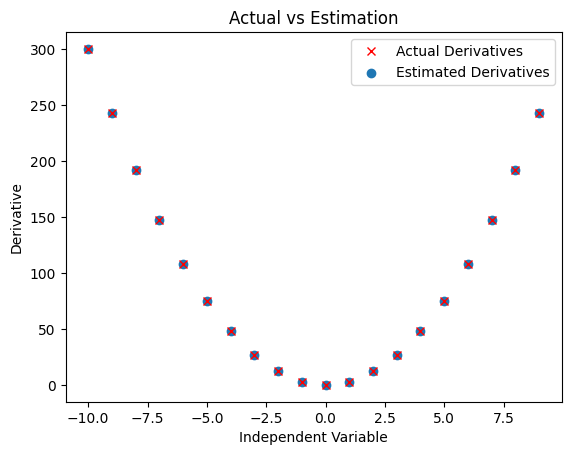

In [3]:
import matplotlib.pyplot as plt

x = range(-10, 10)

actual_derivatives = lambda x: 3 * x ** 2
actual_derivatives = list(map(actual_derivatives, x))

estimated_derivatives = lambda x: estimate_derivative(cubic, x, 0.001)
estimated_derivatives = list(map(estimated_derivatives, x))

plt.plot(x, actual_derivatives, "rx", label = "Actual Derivatives")
plt.scatter(x, estimated_derivatives, label = "Estimated Derivatives")
plt.xlabel("Independent Variable")
plt.ylabel("Derivative")
plt.title("Actual vs Estimation")
plt.legend()
plt.show()

### Gradient Estimation

For a function $ f(x_1,x_2,...,x_n) $, the partial derivative with respect to $x_i$ at point $v = (v_1,v_2,...,v_n)$ is as follows.

$$ \frac{\partial f}{\partial x_i}(\mathbf{v}) = \lim_{h \to 0} \frac{f(v_1, \dots, v_i + h, \dots, v_n) - f(v_1, \dots, v_i, \dots, v_n)}{h} $$

In [6]:
def estimate_partial_derivative(f, v: list, i: int, h: float) -> float:
    
    w = []
    for index, _ in enumerate(v):
        if index == i:
            w.append(v[index] + h)
        else:
            w.append(v[index])

    return (f(w) - f(v)) / h

# f(x, y) = x^2 + y^2
def quadratic(v):
    return v[0]**2 + v[1]**2

point = [2, 3]
estimate_partial_derivative(quadratic, point, 1, 0.001)

6.000999999999479

In [7]:
def estimate_gradient(f, v: list, h: float) -> list:

    gradient_vector = []
    for index, _ in enumerate(v):
        partial_derivative = estimate_partial_derivative(f, v, index, h)
        gradient_vector.append(partial_derivative)

    return gradient_vector


# f(x, y, z) = x^2 + 2xy + z^3
test_function = lambda v: v[0]**2 + 2*v[0]*v[1] + v[2]**3

point = (1, 1, 1)
estimate_gradient(test_function, point, 0.001)

[4.000999999999699, 1.9999999999997797, 3.0030009999997276]

### Final Implementation

In [8]:
import math

# L2 norm (Euclidean distance) as the convergence criterion
def euclidean_distance(v: list, w: list) -> float:

    squared_distance = 0
    for v_i, w_i in zip(v, w):
        squared_distance += (v_i - w_i) ** 2

    return math.sqrt(squared_distance)


def minimize(objective_function, initial_weights: list, learning_rate=0.1, tolerance=1e-6, h=1e-6, max_iterations=1000):
    
    current_weights = initial_weights.copy()
    iteration = 0
    
    while iteration < max_iterations:
        gradient_vector = estimate_gradient(objective_function, current_weights, h)
        next_weights = []
        for weight, gradient in zip(current_weights, gradient_vector):
            next_weights.append(weight - learning_rate * gradient)

        if euclidean_distance(next_weights, current_weights) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break

        current_weights = next_weights
        iteration += 1
    
    else:
        print(f"Reached maximum iterations ({max_iterations}) without convergence.")
        
    return current_weights

def negate_function(function):
    return lambda *args, **kwargs: -function(*args, **kwargs)

def maximize(objective_function, initial_weights: list, learning_rate=0.1, tolerance=1e-6, h=1e-6, max_iterations=1000):
    target_function = negate_function(objective_function)
    return minimize(target_function, initial_weights, learning_rate=0.1, tolerance=1e-6, h=1e-6, max_iterations=1000)

In [13]:
import random

starting_point = []
for i in range(2):
    starting_point.append(random.randint(-10, 10))

minimize(quadratic, starting_point)

Converged after 64 iterations.


[7.554206609897775e-07, -4.8939709003225095e-06]

### Better Convergence Criterion
In the provided code, **Euclidean distance** is calculated as the convergence criterion that is used to check if the weights have stopped changing significantly.

In machine learning, **the change in objective (loss) function value** is typically the preferred convergence criterion

In [14]:
def minimize(loss_function, initial_weights: list, learning_rate=0.1, tolerance=1e-6, h=1e-6, max_iterations=1000):
    current_weights = initial_weights.copy()
    current_loss = loss_function(current_weights)
    iteration = 0
    
    while iteration < max_iterations:
        gradient_vector = estimate_gradient(loss_function, current_weights, h)
        next_weights = [weight - learning_rate * gradient for weight, gradient in zip(current_weights, gradient_vector)]
        next_loss = loss_function(next_weights)
        
        # Better: Check relative change in loss
        if abs(next_loss - current_loss) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break
            
        current_weights = next_weights
        current_loss = next_loss
        iteration += 1
    
    else:
        print(f"Reached maximum iterations ({max_iterations}) without convergence.")
        
    return current_weights

### Learning Rate Schedules (Adaptation)

For a better performance, the learning rate can be reduced over time.

In [ ]:
# Simple learning rate decay
learning_rate = learning_rate * (0.99 ** iteration)

# Or even simpler
# learning_rate = 0.5 * learning_rate

## Gradient Descent Variations
The evolution of Gradient Descent is a core topic in machine learning optimization. The variations can be organized into a clear hierarchy based on how much data they use to compute the gradient.

<img src="../figures/figure_3_2_gradient_descent_variations.png" alt="Gradient Descent Variations">

### The Main Categories: Defined by Data Usage
The primary split is based on the amount of data used to calculate the gradient (and thus the parameter update) in each iteration.

## Stochastic Gradient Descent
Batch (Vanilla) gradient descent, as implemented in the previous section, calculates the gradient using the **entire training dataset** for each single update of the model's parameters. It is a batch process which is stable and convergent but can be slow, computationally expensive and unsuited for large datasets.

**Stochastic gradient descent (SGD)** calculates the gradient using just **one randomly selected training example** for each update. It is an online, example-by-example process that is fast and efficient and can work on huge datasets while being unstable and noisy.

- **Core Idea:** Use a single, random training example to compute the gradient for one update.

- **How it works:**
    - Shuffle the training dataset.
    - For each individual example:
        - Calculate the gradient based on that single example.
        - Immediately update the model parameters.

- **Pros:**
  - Much faster than Batch GD for large datasets.
  - The noisy updates can help jump out of local minima and find potentially better solutions for non-convex functions (like neural networks).

- **Cons:**
  - The noise makes the convergence path very erratic. The loss can oscillate wildly.
  - It never truly "converges" but oscillates around the minimum. (Strategies like learning rate decay can help).
  - Loses the computational advantage of vectorization.

## Mini-batch Gradient Descent

- **Core Idea:** The sweet spot. Use a small, random subset (mini-batch) of the training data (e.g., 32, 64, 128 examples) for each update.

- **How it works:**

    - Split the training data into small batches.
    
    - For each mini-batch:
        
        - Calculate the average gradient for the parameters based on the examples in that batch.
        
        - Update the model parameters.

- **Pros:**

    - Gets the best of both worlds: More stable and convergent than SGD (less noise due to averaging) and faster than Batch GD (doesn't require a full pass for an update).
    
    - Highly compatible with hardware accelerators (GPUs) which excel at parallelizing the operations on batches.

- **Cons:**

    - Introduces a new hyperparameter: batch size.
    
    - Can still get stuck in local minima, though the mini-batch noise can help.
    
In modern deep learning, "SGD" almost always refers to Mini-batch SGD.

## Advanced Optimizers
The basic Mini-batch SGD has two main problems:
1. choosing a good learning rate is hard.
2. the path can be slow and jittery.

The following algorithms are sophisticated variations designed to solve these issues.

- **Momentum-Based Methods**
    - SGD with Momentum
    - Nesterov Accelerated Gradient (NAG)

- **Adaptive Learning Rate Methods**
    - Adagrad (Adaptive Gradient)
    - RMSprop (Root Mean Square Propagation)
    - Adam (Adaptive Moment Estimation)

For most practical purposes, Adam is an excellent starting point due to its adaptive nature and fast convergence. If the absolute best performance and hyperparameters tuning are needed extensively, SGD with Momentum and a learning rate schedule can sometimes achieve a slightly better final result, but it requires more work. Mini-batch SGD is the fundamental underlying process for almost all modern deep learning.

For a deeper dive into how these optimizers work, some useful resources are mentioned at the end of the chapter.

## Linear Classification (Logistic Regression)

## References
[1] "User Guide, Scikit-Learn Documentation", https://scikit-learn.org/stable/user_guide.html, Accessed October 2025.

[2] Goodfellow, Ian., Bengio, Yoshua., Courville, Aaron., "Deep Learning", MIT Press, 2016.

[3] Grus, Joel., "Data Science from Scratch", O'Reilly, 2015.

[4] Geiger, Andreas. "Deep Learning", Lecture, University of Tübingen, https://uni-tuebingen.de/en/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/autonomous-vision/lectures/deep-learning/, Accessed November 2025.

[5] "Multiple Regression", W3schools, https://www.w3schools.com/python/python_ml_multiple_regression.asp, Accessed November 2025.

[6] "Machine Learning with Python Tutorial", Tutorialspoint, https://www.tutorialspoint.com/machine_learning_with_python/index.htm, Accessed October 2025.

[7] "Machine Learning (ML) Tutorial", Tutorialspoint, https://www.tutorialspoint.com/machine_learning/index.htm, Accessed October 2025.

[8] "Pandas Tutorial", W3schools, https://www.w3schools.com/python/pandas/default.asp, Accessed November 2025.

[9] Kneusel, Ronald T., "Math for Deep Learning: What You Need to Know to Understand Neural Networks", No Starch Press, 2022.